In [39]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [40]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)

In [41]:
df = pd.read_pickle('D:\Projects\Cafe db\data')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4696\2140274798.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_pickle('D:\Projects\Cafe db\data')


In [42]:
df.head()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
0,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Яичница с беконом,181.00,45.00,37.50,22.95,14.55,1.00,1,181.00,card,92970 - 6916860058096,Завтрак,Яичница,Зима,Вторник,8,2024-01-09,37.50,Январь,1 Квартал
1,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Сосиски отварные,181.00,65.00,54.17,23.78,30.39,1.00,2,181.00,card,92970 - 6916860058096,Основное блюдо,Колбаски разные,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
2,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Каша овсяная на молоке,181.00,65.00,54.17,13.75,40.42,1.00,3,181.00,card,92970 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
3,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Хлеб ржано-пшеничный,181.00,6.00,5.00,1.84,3.16,1.00,4,181.00,card,92970 - 6916860058096,Хлеб,Хлеб,Зима,Вторник,8,2024-01-09,5.00,Январь,1 Квартал
4,6916860058096,92971,2024-01-09 08:07:00,Ранний завтрак,240,Каша рисовая на молоке,145.00,65.00,54.17,17.42,36.75,1.00,1,145.00,card,92971 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483044 entries, 0 to 483043
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   rnm            483044 non-null  int64         
 1   num_check      483044 non-null  int64         
 2   datetime       483044 non-null  datetime64[ns]
 3   time_eat       483044 non-null  object        
 4   smena          483044 non-null  int64         
 5   good           483044 non-null  object        
 6   total_chek     483044 non-null  float64       
 7   price          483044 non-null  float64       
 8   pr_bez_nds     483044 non-null  float64       
 9   avg_price      483044 non-null  float64       
 10  profit         483044 non-null  float64       
 11  amount         483044 non-null  float64       
 12  position_good  483044 non-null  int64         
 13  summa          483044 non-null  float64       
 14  payment        483044 non-null  object        
 15  

**Анализ цен и поиск выбросов**

In [44]:
df['price'].median()

np.float64(65.0)

In [45]:
df['price'].mean()

np.float64(82.3224479136476)

In [46]:
data = np.array(df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2082d85f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2082d85f750>,
 'boxes': [<matplotlib.lines.Line2D at 0x2082d85f390>],
 'medians': [<matplotlib.lines.Line2D at 0x2082d85f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2082d85fb10>],
 'means': []}

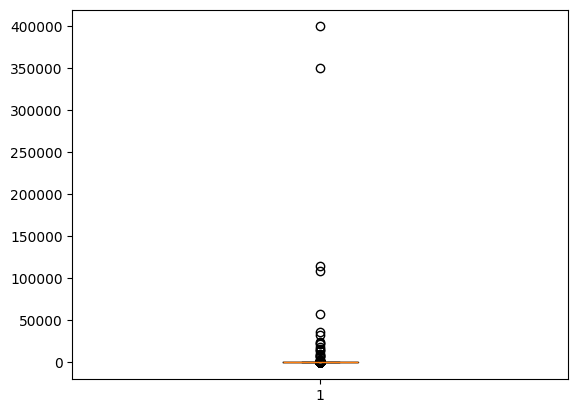

In [47]:
plt.boxplot(data)

In [48]:
df['price'].describe()

count   483,044.00
mean         82.32
std         812.09
min           2.00
25%          40.00
50%          65.00
75%         100.00
max     400,000.00
Name: price, dtype: float64

In [49]:
prc_75 = np.percentile(df['price'], 75)

In [50]:
prc_75

np.float64(100.0)

In [51]:
prc_25 = np.percentile(df['price'], 25)

In [52]:
prc_25

np.float64(40.0)

In [53]:
iqr = prc_75 - prc_25
iqr

np.float64(60.0)

In [54]:
lower_bound = prc_25 - 2.5 * iqr
upper_bound = prc_75 + 24.5 * iqr

In [55]:
print(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")

Нижняя граница: -110.0, Верхняя граница: 1570.0


In [56]:
price_counts = df.groupby('price').size()

In [57]:
price_counts

price
2.00             1
2.01             1
3.00          2752
3.01            41
3.02             6
              ... 
58,000.00        1
108,820.80       1
114,840.00       1
351,000.00       1
400,000.00       1
Length: 1171, dtype: int64

In [58]:
#unique_prices = price_counts[price_counts == 1].index

In [59]:
#df_unique = df[df['price'].isin(unique_prices)]

In [60]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [61]:
outliers.head()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
7403,6916860058096,94721,2024-01-12 11:32:00,Завтрак,243,Пирожки 12.01.24,"6,000.00","6,000.00","5,000.00",13.53,"4,986.47",1.00,1,"6,000.00",cash,94721 - 6916860058096,Индивидуальный заказ,Индивидуальный заказ,Зима,Пятница,11,2024-01-12,"5,000.00",Январь,1 Квартал
9576,6916860058096,95227,2024-01-15 11:02:00,Завтрак,244,Фуршет 15.01,"13,935.00","13,935.00","11,612.50","13,935.00","-2,322.50",1.00,1,"13,935.00",card,95227 - 6916860058096,Индивидуальный заказ,Индивидуальный заказ,Зима,Понедельник,11,2024-01-15,"11,612.50",Январь,1 Квартал
66311,6916860058096,7118,2024-02-15 12:12:00,Обед,14,Фуршет Классен 12.02,"17,940.00","17,940.00","14,950.00","4,233.91","10,716.09",1.00,1,"17,940.00",card,7118 - 6916860058096,Индивидуальный заказ,Индивидуальный заказ,Зима,Четверг,12,2024-02-15,"14,950.00",Февраль,1 Квартал
81332,6916901047427,1479,2024-02-26 14:14:00,Послеобеденный,20,Мероприятие Виноградова А.В.,"10,300.00","10,300.00","8,583.33","2,915.88","5,667.45",1.00,1,"10,300.00",card,1479 - 6916901047427,Индивидуальный заказ,Индивидуальный заказ,Зима,Понедельник,14,2024-02-26,"8,583.33",Февраль,1 Квартал
114528,6916962051742,3481,2024-03-18 13:13:00,Обед,35,Кр.-манипул.устан. Bonfiglioli P10200L/2,"702,000.00","351,000.00","292,500.00","351,000.00","-58,500.00",2.00,1,"702,000.00",card,3481 - 6916962051742,Хрень,Хрень,Весна,Понедельник,13,2024-03-18,"585,000.00",Март,1 Квартал


In [62]:
outliers.groupby(['good', 'price'])['price'].count().sort_values(ascending=False)

good                                                                                                  price     
Медовик  1.7 кг                                                                                       1,700.00      3
мероприятие 15.07.2024                                                                                3,000.00      2
01.10.2024 Ипатов Н.А.                                                                                35,900.00     1
13.08.2024                                                                                            14,935.00     1
29.03.24 Павел Титоренко                                                                              2,350.00      1
30.10.2024                                                                                            24,040.00     1
14.10.2024                                                                                            16,245.00     1
21.10.2024                                                   

In [63]:
outliers['price'].describe()

count        27.00
mean     47,849.29
std      99,062.09
min       1,600.00
25%       3,000.00
50%      13,935.00
75%      28,240.00
max     400,000.00
Name: price, dtype: float64

In [64]:
get_out = outliers['good'].to_list()

In [65]:
get_out

['Пирожки 12.01.24',
 'Фуршет 15.01',
 'Фуршет Классен 12.02',
 'Мероприятие Виноградова А.В.',
 'Кр.-манипул.устан. Bonfiglioli P10200L/2',
 '29.03.24 Павел Титоренко',
 'Фуршет 02.04.24',
 'Фуршет Барсукова',
 'мероприятие 15.07.2024',
 'мероприятие 15.07.2024',
 'УРАЛ-325512-0010-41 Средство транспортное специальное пассажирское № X1P325512B1369640',
 'Медовик  1.7 кг',
 'Мероприятие 01.08.2024',
 '13.08.2024',
 'Медовик  1.7 кг',
 'Электростанция дизельная с электростартером и коннектором автоматики DS 7000 DA ES',
 'УАЗ-390995 Автомобиль грузовой фургон (XTT390995B0417964)',
 'Медовик  1.7 кг',
 'Мероприятие 09.09.2024',
 'Мероприятие 16.09.2024',
 '01.10.2024 Ипатов Н.А.',
 'Прицеп-вагон дом  передвижной типа  Сибирь  А8х2,8 на базе тракт.прицепа VIN:1385 (QCS-1-1.2010.054)',
 'Вагончик складской на полозьях',
 'Вагон-дом без шасси бытовка',
 '14.10.2024',
 '21.10.2024',
 '30.10.2024']

In [66]:
get_out.remove('Медовик  1.7 кг')
get_out.remove('Медовик  1.7 кг')
get_out.remove('Медовик  1.7 кг')

In [67]:
get_out

['Пирожки 12.01.24',
 'Фуршет 15.01',
 'Фуршет Классен 12.02',
 'Мероприятие Виноградова А.В.',
 'Кр.-манипул.устан. Bonfiglioli P10200L/2',
 '29.03.24 Павел Титоренко',
 'Фуршет 02.04.24',
 'Фуршет Барсукова',
 'мероприятие 15.07.2024',
 'мероприятие 15.07.2024',
 'УРАЛ-325512-0010-41 Средство транспортное специальное пассажирское № X1P325512B1369640',
 'Мероприятие 01.08.2024',
 '13.08.2024',
 'Электростанция дизельная с электростартером и коннектором автоматики DS 7000 DA ES',
 'УАЗ-390995 Автомобиль грузовой фургон (XTT390995B0417964)',
 'Мероприятие 09.09.2024',
 'Мероприятие 16.09.2024',
 '01.10.2024 Ипатов Н.А.',
 'Прицеп-вагон дом  передвижной типа  Сибирь  А8х2,8 на базе тракт.прицепа VIN:1385 (QCS-1-1.2010.054)',
 'Вагончик складской на полозьях',
 'Вагон-дом без шасси бытовка',
 '14.10.2024',
 '21.10.2024',
 '30.10.2024']

In [68]:
df_filtered = df[~df['good'].isin(get_out)]

In [69]:
df_filtered

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
0,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Яичница с беконом,181.00,45.00,37.50,22.95,14.55,1.00,1,181.00,card,92970 - 6916860058096,Завтрак,Яичница,Зима,Вторник,8,2024-01-09,37.50,Январь,1 Квартал
1,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Сосиски отварные,181.00,65.00,54.17,23.78,30.39,1.00,2,181.00,card,92970 - 6916860058096,Основное блюдо,Колбаски разные,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
2,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Каша овсяная на молоке,181.00,65.00,54.17,13.75,40.42,1.00,3,181.00,card,92970 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
3,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Хлеб ржано-пшеничный,181.00,6.00,5.00,1.84,3.16,1.00,4,181.00,card,92970 - 6916860058096,Хлеб,Хлеб,Зима,Вторник,8,2024-01-09,5.00,Январь,1 Квартал
4,6916860058096,92971,2024-01-09 08:07:00,Ранний завтрак,240,Каша рисовая на молоке,145.00,65.00,54.17,17.42,36.75,1.00,1,145.00,card,92971 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483039,6916962051742,19202,2024-10-31 18:00:00,Скидки,194,Греча с грибами и луком,294.00,48.00,40.00,16.75,23.25,1.00,4,294.00,card,19202 - 6916962051742,Гарнир,Греча,Осень,Четверг,18,2024-10-31,40.00,Октябрь,4 Квартал
483040,6916962051742,19203,2024-10-31 18:04:00,Скидки,194,Стейк из свиной шеи,338.00,122.70,102.25,91.09,11.16,1.00,1,338.00,card,19203 - 6916962051742,Основное блюдо,Блюда из свинины,Осень,Четверг,18,2024-10-31,102.25,Октябрь,4 Квартал
483041,6916962051742,19203,2024-10-31 18:04:00,Скидки,194,Филе куриное запеченное с грибами,338.00,92.65,77.21,42.93,34.28,2.00,2,338.00,card,19203 - 6916962051742,Основное блюдо,Блюда из курицы,Осень,Четверг,18,2024-10-31,154.42,Октябрь,4 Квартал
483042,6916962051742,19203,2024-10-31 18:04:00,Скидки,194,Крафт для горячего 500 мл,338.00,15.00,12.50,7.92,4.58,2.00,3,338.00,card,19203 - 6916962051742,Контейнер,Контейнер,Осень,Четверг,18,2024-10-31,25.00,Октябрь,4 Квартал


{'whiskers': [<matplotlib.lines.Line2D at 0x20829efbed0>,
 'caps': [<matplotlib.lines.Line2D at 0x20829f58190>,
 'boxes': [<matplotlib.lines.Line2D at 0x20829efbd90>],
 'medians': [<matplotlib.lines.Line2D at 0x20829f58410>],
 'fliers': [<matplotlib.lines.Line2D at 0x20829f58550>],
 'means': []}

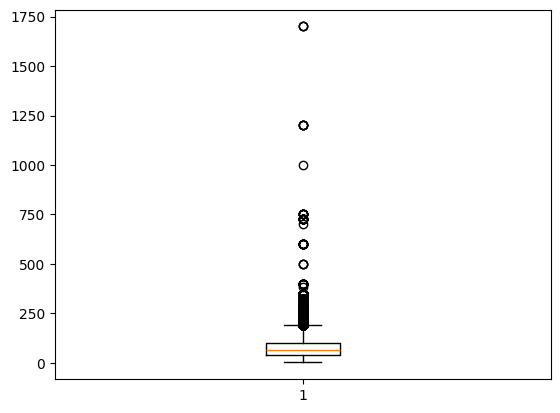

In [70]:
plt.boxplot(df_filtered['price'])

In [71]:
#df_filtered.to_csv(r'D:\Projects\Cafe BI\fact_table_corr.csv', index=False)

In [72]:
df_filtered['price'].describe()

count   483,020.00
mean         79.66
std          61.28
min           2.00
25%          40.00
50%          65.00
75%         100.00
max       1,700.00
Name: price, dtype: float64

In [73]:
df_anomaly = df[df['good'].isin(get_out)]

In [74]:
#df_anomaly.to_csv('anomaly_table.csv', index=False)

In [ ]:
#df_filtered.to_pickle(r'D:\Projects\Cafe db\filtered_data')

In [ ]:
df_filtered.groupby('mnth')['check_unique'].count()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4696\3030223079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby('mnth')['check_unique'].count()


mnth
Январь      41383
Февраль     48588
Март        48640
Апрель      51297
Май         47252
Июнь        40467
Июль        47892
Август      46838
Сентябрь    51243
Октябрь     59420
Ноябрь          0
Декабрь         0
Name: check_unique, dtype: int64

In [38]:
df_filtered.columns

Index(['rnm', 'num_check', 'datetime', 'time_eat', 'smena', 'good',
       'total_chek', 'price', 'pr_bez_nds', 'avg_price', 'profit', 'amount',
       'position_good', 'summa', 'payment', 'check_unique', 'group',
       'on-group', 'seasons', 'day', 'hour', 'date', 'revenue', 'mnth',
       'quart'],
      dtype='object')